In [1]:
%matplotlib inline

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import pyproj
import os
from shapely.geometry import Point, Polygon


df = pd.read_csv("DoBIH_v16_3.csv", encoding='latin-1')

/home/decval/venvs/bgsetl_test/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (3,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [41]:
regions = gpd.read_file('ne_10m_uk.gpkg', layer='admin_1_states_provinces')

area_of_interest = Polygon([(-9, 49), (-9, 62), (2, 62), (2, 49)])
regions['geometry'] = regions.intersection(area_of_interest)

towns = gpd.read_file('ne_10m_uk.gpkg', layer='populated_places')
countries = regions[['geonunit', 'geometry']].dissolve(by='geonunit')
countries['country'] = countries.index.values
output_file_name = os.path.join('countries.shp')
countries.to_file(output_file_name)
countries_osgb = countries.to_crs({'init': 'epsg:27700'})
towns_osgb = towns.to_crs({'init': 'epsg:27700'})

In [39]:
df['coords'] = list(zip(df['Longitude'], df['Latitude']))
df['coords'] = df['coords'].apply(Point)

df = gpd.GeoDataFrame(df, geometry='coords', crs={'init': 'epsg:4326'})

df_osgb = df.to_crs({'init': 'epsg:27700'})

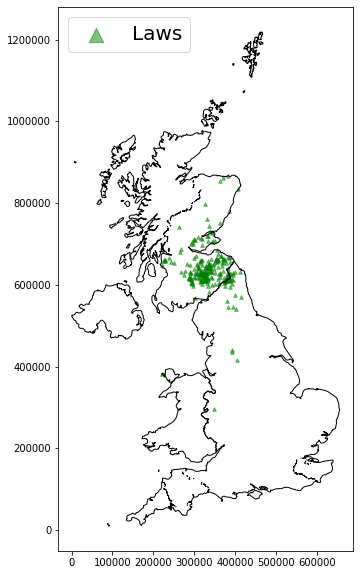

In [72]:
fells_gdf = df_osgb[df_osgb['Name'].str.contains('Law | Law')]
fells_gdf = fells_gdf[~fells_gdf['Name'].str.contains('Ysgafell')]

fig, ax = plt.subplots(figsize=(10, 10))

fells_gdf.plot(ax=ax, legend=True, color='green', markersize=13,alpha=0.5, marker='^', label="Laws")

# Add country outlines
countries_osgb.plot(ax=ax, edgecolor='black', facecolor='none')

# Make figure aspect ratio ensure that 10x10 km square appears square
ax.set_aspect('equal', 'box')
leg = ax.legend()
plt.legend(loc=2, markerscale=4, prop={'size': 20})
plt.savefig('law.png')

In [73]:
fells_gdf.sort_values('Latitude', ascending=True)

,Number,Name,Parent (SMC),Parent name (SMC),Section,Region,Area,Island,Topo Section,County,...,Dil,VL,A,MDew,sMDew,Ca,Bin,O,Un,coords
5351,5352,The Lawley,NaN,NaN,38A,38A: Shropshire,NaN,NaN,T07:Welshpool to Corve Dale,Shropshire,...,0,0,0,0,0,0,0,0,0,POINT (349469.1786537102 297494.1012805669)
14855,14856,Ynys Lawd [South Stack],NaN,NaN,30A,30A: Anglesey and the Lleyn Peninsula,North Wales - Anglesey,Mono Tump island,Z14:Tump islands Welsh,Anglesey [Sir Fon],...,0,0,0,0,0,0,0,0,0,POINT (220225.8560917986 382268.3836303982)
16626,16627,Pike Law,NaN,NaN,36,"36: Lancashire, Cheshire and S Pennines",NaN,NaN,R01:The South Pennines from Liverpool to Notti...,Calderdale,...,0,0,0,0,0,0,0,0,0,POINT (404532.7831783409 417377.4848309857)
2815,2816,Boulsworth Hill - Lad Law,NaN,NaN,36,"36: Lancashire, Cheshire and S Pennines",Southern Pennines,NaN,R01:The South Pennines from Liverpool to Notti...,Lancashire,...,0,0,0,0,0,0,0,0,0,POINT (392970.5903931878 435631.8801978175)
16707,16708,Law Hill,NaN,NaN,36,"36: Lancashire, Cheshire and S Pennines",NaN,NaN,R01:The South Pennines from Liverpool to Notti...,Lancashire,...,0,0,0,0,0,0,0,0,0,POINT (391486.6282719314 441105.9834601196)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6190,6191,Knock of Lawsie,NaN,NaN,08B,08B: Cairngorms,NaN,NaN,J03:The Cairngorms to the Hills of Cromdale,Aberdeenshire,...,0,0,0,0,0,0,0,0,0,POINT (326590.6234647999 797931.6267654728)
11814,11815,High Law,NaN,NaN,21B,21B: Fraserburgh to the Dee Valley,NaN,NaN,J06:River Don to Kinnaird Head,Aberdeenshire,...,0,0,0,0,0,0,0,0,0,POINT (406226.3633422349 833931.1229928966)
4905,4906,Black Law,NaN,NaN,21B,21B: Fraserburgh to the Dee Valley,NaN,NaN,J05:The Ladder Hills to Banff,Aberdeenshire,...,0,0,0,0,0,0,0,0,0,POINT (363811.5922406937 854566.6739845132)
11810,11811,Comfort Law,NaN,NaN,21B,21B: Fraserburgh to the Dee Valley,NaN,NaN,J06:River Don to Kinnaird Head,Aberdeenshire,...,0,0,0,0,0,0,0,0,1,POINT (370899.78557613 861698.2766091812)
